Epoch: #0, MSE: 0.334162
Epoch: #10, MSE: 0.250272
Epoch: #20, MSE: 0.250194
Epoch: #30, MSE: 0.250164
Epoch: #40, MSE: 0.250136
Epoch: #50, MSE: 0.250110
Epoch: #60, MSE: 0.250086
Epoch: #70, MSE: 0.250063
Epoch: #80, MSE: 0.250041
Epoch: #90, MSE: 0.250020
Epoch: #100, MSE: 0.249999
Epoch: #110, MSE: 0.249976
Epoch: #120, MSE: 0.249952
Epoch: #130, MSE: 0.249924
Epoch: #140, MSE: 0.249892
Epoch: #150, MSE: 0.249854
Epoch: #160, MSE: 0.249809
Epoch: #170, MSE: 0.249754
Epoch: #180, MSE: 0.249687
Epoch: #190, MSE: 0.249607
Epoch: #200, MSE: 0.249511
Epoch: #210, MSE: 0.249396
Epoch: #220, MSE: 0.249259
Epoch: #230, MSE: 0.249095
Epoch: #240, MSE: 0.248902
Epoch: #250, MSE: 0.248673
Epoch: #260, MSE: 0.248404
Epoch: #270, MSE: 0.248090
Epoch: #280, MSE: 0.247725
Epoch: #290, MSE: 0.247305
Epoch: #300, MSE: 0.246824
Epoch: #310, MSE: 0.246280
Epoch: #320, MSE: 0.245669
Epoch: #330, MSE: 0.244991
Epoch: #340, MSE: 0.244246
Epoch: #350, MSE: 0.243437
Epoch: #360, MSE: 0.242568
Epoch: #370,

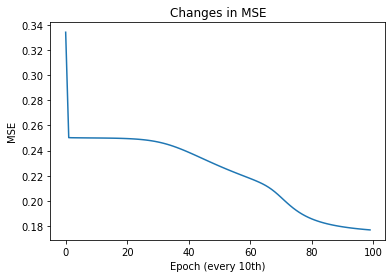

In [39]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)

# Represents a hidden or output layer in our neural network.
class Layer:

    """
    no_inputs : size of input from previous layer
    no_neurons : number of neurons in current layer
    weights : weights of current layer
    """

    def __init__(self, no_inputs, no_neurons, weights = None, bias = None):
        self.weights = weights if weights is not None else np.random.rand(no_inputs, no_neurons)
        self.bias = bias if bias is not None else np.random.rand(no_neurons)


    # Calculates the dot product of current layer.
    def activate(self, x):
        y = np.dot(x, self.weights) + self.bias
        self.last_activation = self.apply_activation(y)
        return self.last_activation


    # Applies the sigmoid activation function
    def apply_activation(self, x):
        return 1 / (1 + np.exp(-x))

    def apply_activation_derivative(self, r):
        return r * (1 - r)

# Represents a neural network.
class NeuralNetwork:
    def __init__(self):
        # List of layers in this neural network
        self.layers = []


    # Adds a layer to the neural network.
    def add_layer(self, layer):
        self.layers.append(layer)


    #Feed forward the input through the layers.
    def feed_forward(self, X):
        for layer in self.layers:
            X = layer.activate(X)

        return X

    # Predicts a class or classes.
    def predict(self, X):
        ff = self.feed_forward(X)

        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)


    # Performs the backward propagation algorithm and updates the layers weights.
    def back_propagation(self, X, y, learning_rate):
        """
        :param X: The input values.
        :param y: The target values.
        :param float learning_rate: The learning rate (between 0 and 1).
        """

        # Feed forward for the output

        output = self.feed_forward(X)

        # Loop over the layers backward

        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]

            # If this is the output layer
            if layer == self.layers[-1]:
                layer.error = y - output
                # The output = layer.last_activation in this case
                layer.delta = layer.error * layer.apply_activation_derivative(output)

            else:
                next_layer = self.layers[i + 1]
                layer.error = np.dot(next_layer.weights, next_layer.delta)
                layer.delta = layer.error * layer.apply_activation_derivative(layer.last_activation)

        # Update the weights

        for i in range(len(self.layers)):
            layer = self.layers[i]
            # The input is either the previous layers output or X itself (for the first hidden layer)
            input_to_use = np.atleast_2d(X if i == 0 else self.layers[i - 1].last_activation)
            layer.weights += layer.delta * input_to_use.T * learning_rate


    def train(self, X, y, learning_rate, max_epochs):
        """

        Trains the neural network using backpropagation.

        :param X: The input values.

        :param y: The target values.

        :param float learning_rate: The learning rate (between 0 and 1).

        :param int max_epochs: The maximum number of epochs (cycles).

        :return: The list of calculated MSE errors.

        """

        mses = []

        for i in range(max_epochs):
            for j in range(len(X)):
                self.back_propagation(X[j], y[j], learning_rate)
            if i % 10 == 0:
                mse = np.mean(np.square(y - nn.feed_forward(X)))
                mses.append(mse)
                print('Epoch: #%s, MSE: %f' % (i, float(mse)))

        return mses

    @staticmethod
    def accuracy(y_pred, y_true):
        return (y_pred == y_true).mean()

nn = NeuralNetwork()
nn.add_layer(Layer(2, 3))
nn.add_layer(Layer(3, 3))
nn.add_layer(Layer(3, 2))


# Define dataset

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])


# Train the neural network

errors = nn.train(X, y, 0.9, 1000)
print('Accuracy: %.2f%%' % (nn.accuracy(nn.predict(X), y.flatten()) * 100))

# Plot changes in mse

plt.plot(errors)
plt.title('Changes in MSE')
plt.xlabel('Epoch (every 10th)')
plt.ylabel('MSE')
plt.show()